<a href="https://colab.research.google.com/github/Saad20x/Telco-Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
customers_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
customers_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
customers_df = customers_df[customers_df['TotalCharges'] != ' ']
customers_df.TotalCharges = customers_df.TotalCharges.astype('float')
nb_customers = len(customers_df.index)
print('There are a total of %s customers in the dataset among which %s left within the last month.' %(nb_customers, customers_df[customers_df['Churn'] == "Yes"].shape[0]))
churnNB = customers_df['Churn'].value_counts()[1]
churnrate = float(churnNB) / nb_customers
print('The churn rate is {:.2f}%'.format(churnrate*100))



There are a total of 7032 customers in the dataset among which 1869 left within the last month.
The churn rate is 26.58%


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
customers_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customers_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
customers_df.SeniorCitizen = customers_df.SeniorCitizen.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
customers_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
loyal_customers = customers_df[customers_df['Churn'] == 'No']
disloyal_customers = customers_df[customers_df['Churn'] == 'Yes']

In [ ]:
len(disloyal_customers)


1869

Charges & Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

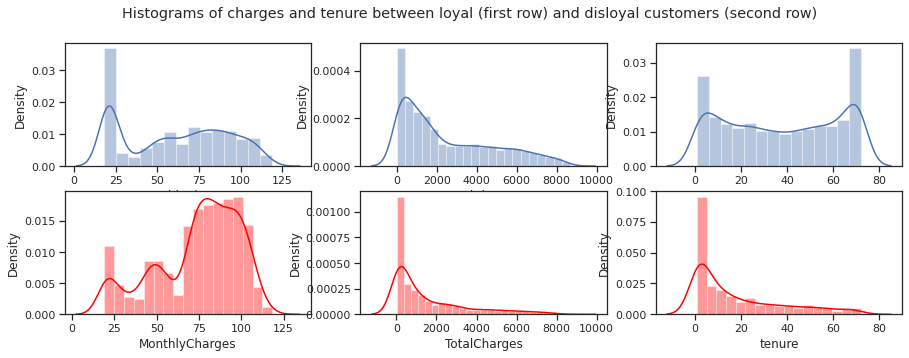

In [ ]:
dims = (15, 5)
fig, ax = plt.subplots(2,3, figsize=dims)
plt.suptitle('Histograms of charges and tenure between loyal (first row) and disloyal customers (second row)')
#loyal
sns.distplot(loyal_customers.MonthlyCharges, ax=ax[0,0])
sns.distplot(loyal_customers.TotalCharges, ax=ax[0,1])
sns.distplot(loyal_customers.tenure, ax=ax[0,2])
#disloyal
sns.distplot(disloyal_customers.MonthlyCharges, ax=ax[1,0], color='red')
sns.distplot(disloyal_customers.TotalCharges, ax=ax[1,1], color='red')
sns.distplot(disloyal_customers.tenure, ax=ax[1,2], color='red')
plt.savefig('charges & tenure.jpg')

**Contract & Services**

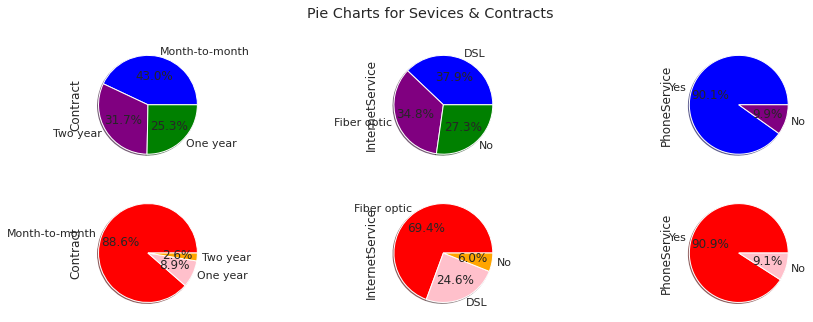

In [ ]:
dims = (15,5)
fig, ax = plt.subplots(2,3, figsize=dims)
plt.suptitle('Pie Charts for Sevices & Contracts')
#loyal
loyal_customers.Contract.value_counts().plot(kind='pie', shadow=True,autopct='%1.1f%%', ax=ax[0,0], colors = ['blue', 'purple', 'green'])
loyal_customers.InternetService.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', ax=ax[0,1], colors = ['blue','purple','green'])
loyal_customers.PhoneService.value_counts().plot(kind='pie', shadow='True', autopct='%1.1f%%', ax=ax[0,2], colors = ['blue','purple','green'])
#disloyal
disloyal_customers.Contract.value_counts().plot(kind='pie', shadow='True', autopct='%1.1f%%', ax=ax[1,0], colors = ['Red','pink','orange'])
disloyal_customers.InternetService.value_counts().plot(kind='pie',shadow=True, autopct='%1.1f%%', ax=ax[1,1], colors = ['Red','pink','orange'])
disloyal_customers.PhoneService.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', ax=ax[1,2], colors = ['Red','Pink','Orange'])

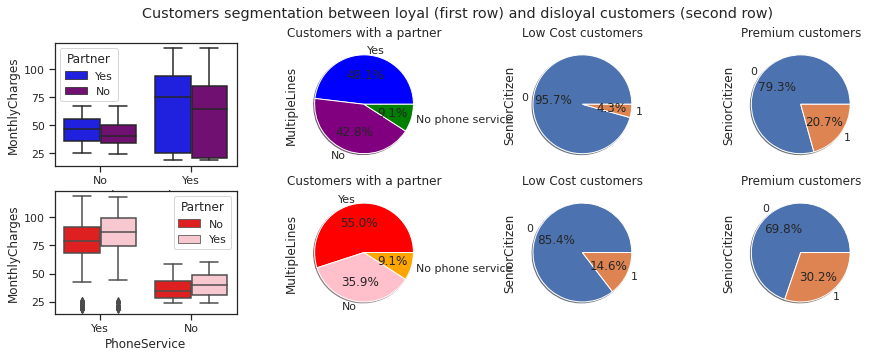

In [ ]:
dims = (15, 5)
fig, ax =plt.subplots(2,4,figsize=dims)
plt.suptitle('Customers segmentation between loyal (first row) and disloyal customers (second row) ')
#loyal customers
sns.boxplot(x="PhoneService", y="MonthlyCharges", hue="Partner", data=loyal_customers, ax=ax[0,0], palette = ['blue', 'purple', 'green'])
loyal_customers[loyal_customers['Partner'] == 'Yes'].MultipleLines.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,1], title='Customers with a partner', colors = ['blue', 'purple', 'green'])
loyal_customers[loyal_customers['MonthlyCharges'] < 40].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,2], title='Low Cost customers')
loyal_customers[loyal_customers['MonthlyCharges'] > 70].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,3], title='Premium customers')
#disloyal customers
sns.boxplot(x="PhoneService", y="MonthlyCharges", hue="Partner", data=disloyal_customers, ax=ax[1,0], palette = ['red', 'pink', 'orange'])
disloyal_customers[disloyal_customers['Partner'] == 'Yes'].MultipleLines.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,1], title='Customers with a partner', colors = ['red', 'pink', 'orange'])
disloyal_customers[disloyal_customers['MonthlyCharges'] < 40].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,2], title='Low Cost customers')
disloyal_customers[disloyal_customers['MonthlyCharges'] > 70].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,3], title='Premium customers')
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.savefig('multi_variate.jpg')



In [ ]:
print("Proportion of senior citizen in whole database %s" %(customers_df.SeniorCitizen.value_counts().values / customers_df.shape[0]))
print("Proportion of senior citizen among loyal customers %s" %(loyal_customers.SeniorCitizen.value_counts().values / loyal_customers.shape[0]))
print("Proportion of senior citizen among disloyal customers %s" %(disloyal_customers.SeniorCitizen.value_counts().values / disloyal_customers.shape[0]))

Proportion of senior citizen in whole database [0.83759954 0.16240046]
Proportion of senior citizen among loyal customers [0.87100523 0.12899477]
Proportion of senior citizen among disloyal customers [0.74531835 0.25468165]


In [ ]:
data = customers_df.copy()

data["Male"]=data['gender'].map(lambda x : 1  if x =='Male' else 0)
data = data.drop(columns="gender")

In [ ]:
data["InternetYes"] = data['InternetService'].map(lambda x : 0 if x =='No' else 1)
data["FiberOptic"] = data['InternetService'].map(lambda x : 1 if x =='Fiber optic' else 0)
data = data.drop(columns="InternetService")

In [ ]:
data["Churn"] = data['Churn'].map(lambda x :1 if x == 'Yes' else 0)

In [ ]:
data

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,InternetYes,FiberOptic
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,1,0
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,1,0
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,1,0
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,1,1,0
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0,1,1
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,1,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1,1,1


In [ ]:
binary_columns = ["Partner","Dependents","PhoneService","MultipleLines","PaperlessBilling","OnlineSecurity",
                "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

In [ ]:
for c in binary_columns:
  data[c] = data[c].map(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
data

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,InternetYes,FiberOptic
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,1,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,1,1,0
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,1
7040,4801-JZAZL,0,1,1,11,0,0,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,1,1,1


In [ ]:
data = pd.concat([data, pd.get_dummies(data["Contract"],prefix="Contract")], axis=1)
data = data.drop(['Contract'], axis=1)

data = pd.concat([data, pd.get_dummies(data["PaymentMethod"],prefix="Pay")], axis=1)
data= data.drop(columns="PaymentMethod")


data = data.drop(columns="customerID")


In [ ]:
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,InternetYes,FiberOptic,Contract_Month-to-month,Contract_One year,Contract_Two year,Pay_Bank transfer (automatic),Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,1,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,1,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [ ]:
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,InternetYes,FiberOptic,Contract_Month-to-month,Contract_One year,Contract_Two year,Pay_Bank transfer (automatic),Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.662189,0.227521,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.845274,0.847461,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112935,0.037809,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.558706,0.033210,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix


In [ ]:
def print_confusion_matrix(y_test, y_pred) :   
    
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,0]), columns = ['Churn Yes', 'Churn No'])
    conf_matrix.index = ['Churn Yes', 'Churn No']
    
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
    print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))
    print("Confusion Matrix:")
    
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True labels')

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="Churn"), data["Churn"], stratify=data["Churn"], random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, stratify=y_test, random_state=42)



Accuracy Score: 0.26590909090909093
Recall Score: 1.0
Precision Score: 0.26590909090909093
Confusion Matrix:


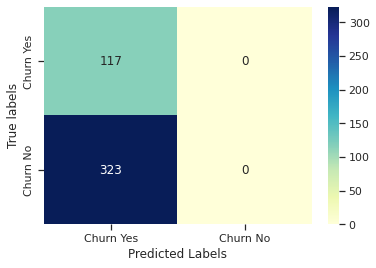

In [ ]:
everyone_churn = np.ones_like(y_test)
print_confusion_matrix(y_test, everyone_churn)
plt.savefig('everyone_churn.png')



Accuracy Score: 0.7340909090909091
Recall Score: 0.0
Precision Score: 0.0
Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


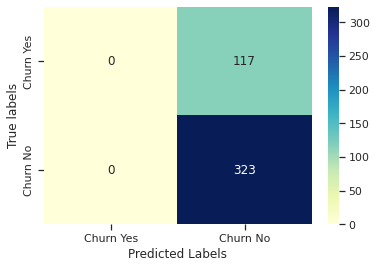

In [ ]:
nobody_churn = np.zeros_like(y_test)
print_confusion_matrix(y_test, nobody_churn)
plt.savefig('nobody_churn.png')

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker



In [ ]:


param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-1, 1, 10),
    'solver' : ['liblinear']}

clf = LogisticRegression()
gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=0, scoring="recall")
gs.fit(X_train, y_train)

y_score = gs.decision_function(X_valid)

precision, recall, thresholds = precision_recall_curve(y_valid, y_score)



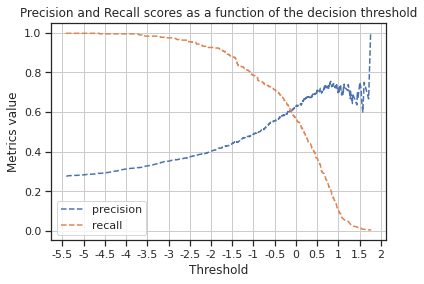

In [ ]:
plt.plot(thresholds, precision[:len(precision)-1], label='precision', ls = 'dashed')
plt.plot(thresholds, recall[:len(recall)-1], label='recall', ls = 'dashed')
plt.legend()
plt.title('Precision and Recall scores as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('Metrics value')
plt.grid()

#axes
ax=plt.gca()

f = lambda x,pos: str(x).rstrip('0').rstrip('.')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(f))
plt.show()


Accuracy Score: 0.7090909090909091
Recall Score: 0.905982905982906
Precision Score: 0.47533632286995514
Confusion Matrix:


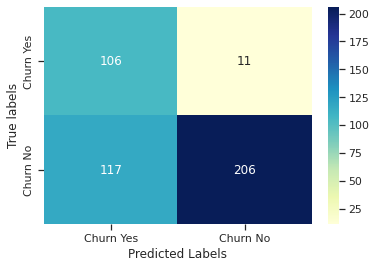

In [ ]:


y_pred_threshold = (gs.decision_function(X_test) >= -1.5).astype(bool) #this computes a new set of y_pred based on a different threshold, which we set on the decision function 

print_confusion_matrix(y_test,y_pred_threshold)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()



In [ ]:
estimator = gs.best_estimator_
class_labels = gs.classes_
weights = estimator.coef_[0]
weights_index = np.argsort(weights)[::-1]


#take 5 most important feature in each class
weights = np.sort(weights)[::-1]

#about to churn
positive_class = weights_index[:5]
positive_feature = X_train.columns[positive_class].values
coeff_pos = weights[:5]



negative_class = weights_index[-5:][::-1]
negative_feature = X_train.columns[negative_class].values
coeff_neg = weights[-5:][::-1]


top5_class1 = list(zip(coeff_pos, positive_feature))
top5_class2 = list(zip(coeff_neg, negative_feature))

print("Most important feature used to predict churn with their weights")
print('--------------------------------------')

for w, n in top5_class1 :
    print("{} : {}".format(n, w))
    
print('-----------')
    
for w, n in top5_class2 :
    print("{} : {}".format(n, w))

Most important feature used to predict churn with their weights
--------------------------------------
TotalCharges : 2.5928838904722635
InternetYes : 1.958455186525021
FiberOptic : 1.8844907747497008
StreamingTV : 0.6844143259390025
StreamingMovies : 0.6411358943570463
-----------
MonthlyCharges : -4.4735201258416755
tenure : -4.009862758419183
Contract_Two year : -1.3703426085120605
Contract_One year : -0.6847524042130306
Dependents : -0.2439157169433584


In [ ]:
print("Number of customers : %s" % y_test.shape[0])
print("Number of churning customers : %s" % sum(y_test == 1))

Number of customers : 440
Number of churning customers : 117


In [ ]:
def cost(clients_to_retain, clients_to_obtain) :
    return 50*clients_to_retain + 200*clients_to_obtain

In [ ]:
nobody_churn = cost(0, 117)
everyone_churn = cost(440, 0)
logit_model = cost(106, 11)

strategies = [(nobody_churn, "No action taken"), (everyone_churn, "Retain all customers"), (logit_model, "Our model")]

all_costs = pd.DataFrame(strategies, columns=["Cost ($)", "Strategy"])
all_costs.head()



,Cost ($),Strategy
0,23400,No action taken
1,22000,Retain all customers
2,7500,Our model


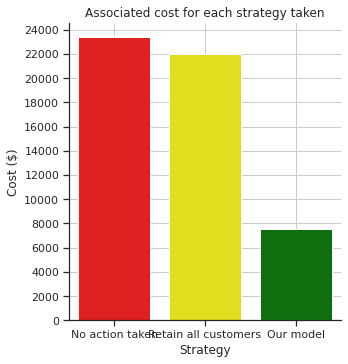

In [ ]:
sns.catplot(x="Strategy", y="Cost ($)", kind="bar", data=all_costs, palette=["red", "yellow", "green"])
plt.title("Associated cost for each strategy taken")
plt.savefig("strategies_cost.png")
plt.grid()

ax=plt.gca()
f = lambda x,pos: str(x).rstrip('0').rstrip('.')
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(f))

plt.show()